In [1]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
res = requests.get('https://api.covid19india.org/data.json')
res.status_code

200

In [3]:
res_json = res.json()

In [4]:
data = pd.DataFrame(res_json['cases_time_series'],columns = res_json['cases_time_series'][0])
data

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January,1,0,0
1,0,0,0,31 January,1,0,0
2,0,0,0,01 February,1,0,0
3,1,0,0,02 February,2,0,0
4,1,0,0,03 February,3,0,0
...,...,...,...,...,...,...,...
145,15656,468,10462,23 June,456120,14484,258600
146,16868,424,13089,24 June,472988,14908,271689
147,18205,401,13983,25 June,491193,15309,285672
148,18255,381,10246,26 June,509448,15690,295918


In [5]:
data.index = data['date']
data.drop('date',inplace=True,axis=1)


In [6]:
data = data.astype('int64')
data.dtypes

dailyconfirmed    int64
dailydeceased     int64
dailyrecovered    int64
totalconfirmed    int64
totaldeceased     int64
totalrecovered    int64
dtype: object

In [7]:
mm = MinMaxScaler()
data_trans = mm.fit_transform(data)
data_trans = pd.DataFrame(data_trans)
data_trans.columns = ['dailyconfirmed','dailydeceased','dailyrecovered','totalconfirmed','totaldeceased','totalrecovered']

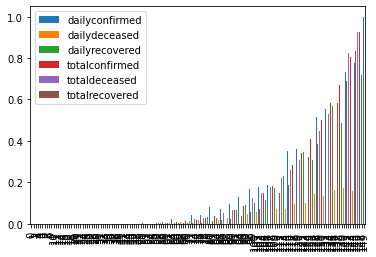

In [8]:
data_trans.plot(kind='bar')

In [9]:
data_trans.describe()

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.175285,0.053573,0.145312,0.161264,0.161559,0.133780
std,0.244002,0.100141,0.240845,0.255019,0.257970,0.238655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000285,0.000000,0.000000,0.000065,0.000000,0.000010
50%,0.044881,0.016966,0.011174,0.020711,0.023441,0.004132
75%,0.297587,0.072355,0.217355,0.220390,0.220194,0.154025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data_trans_mean = data_trans.rolling(window=30).mean()
data_trans_mean

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
145,0.525573,0.174002,0.470649,0.530167,0.522895,0.460106
146,0.542874,0.178560,0.494256,0.550815,0.545115,0.482782
147,0.563226,0.182352,0.518615,0.572236,0.567807,0.506575
148,0.581445,0.185562,0.534573,0.594350,0.590899,0.531100


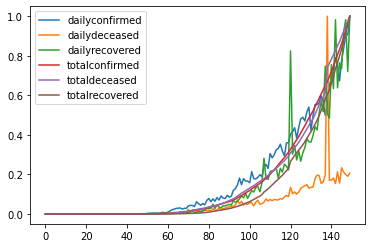

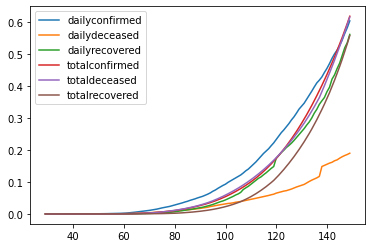

In [11]:
data_trans.plot()
data_trans_mean.plot()

In [12]:
series_value = data_trans.values
type(series_value)

numpy.ndarray

In [13]:
value = pd.DataFrame(series_value)

In [14]:
mod_data = pd.concat([value,value.shift(1)],axis=1)

In [15]:
mod_data.head()

,0,1,2,3,4,5,0,1,2,3,4,5
0,0.00005,0.0,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00000,0.0,0.0,0.000000,0.0,0.0,0.00005,0.0,0.0,0.000000,0.0,0.0
2,0.00000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
3,0.00005,0.0,0.0,0.000002,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
4,0.00005,0.0,0.0,0.000004,0.0,0.0,0.00005,0.0,0.0,0.000002,0.0,0.0


In [16]:
mod_data.columns = ['dailyconfirmed','dailydeceased','dailyrecovered','totalconfirmed','totaldeceased','totalrecovered','pred_dailyconfirmed','pred_dailydeceased','pred_dailyrecovered','pred_totalconfirmed','pred_totaldeceased','pred_totalrecovered']
mod_data.head()

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered,pred_dailyconfirmed,pred_dailydeceased,pred_dailyrecovered,pred_totalconfirmed,pred_totaldeceased,pred_totalrecovered
0,0.00005,0.0,0.0,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00000,0.0,0.0,0.000000,0.0,0.0,0.00005,0.0,0.0,0.000000,0.0,0.0
2,0.00000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
3,0.00005,0.0,0.0,0.000002,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0
4,0.00005,0.0,0.0,0.000004,0.0,0.0,0.00005,0.0,0.0,0.000002,0.0,0.0


In [17]:
mod_data.dropna(axis=0,inplace=True)
mod_data

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered,pred_dailyconfirmed,pred_dailydeceased,pred_dailyrecovered,pred_totalconfirmed,pred_totaldeceased,pred_totalrecovered
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000050,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000050,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000050,0.000000,0.000000,0.000004,0.000000,0.000000,0.000050,0.000000,0.000000,0.000002,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000004,0.000000,0.000000,0.000050,0.000000,0.000000,0.000004,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.777281,0.233533,0.735259,0.861270,0.899404,0.833798,0.673220,0.155689,0.764565,0.831707,0.870343,0.800066
146,0.837454,0.211577,0.919882,0.893121,0.925733,0.876001,0.777281,0.233533,0.735259,0.861270,0.899404,0.833798
147,0.903833,0.200100,0.982711,0.927497,0.950633,0.921086,0.837454,0.211577,0.919882,0.893121,0.925733,0.876001
148,0.906315,0.190120,0.720079,0.961967,0.974292,0.954122,0.903833,0.200100,0.982711,0.927497,0.950633,0.921086


In [18]:
independent_var = ['dailyconfirmed','dailydeceased','dailyrecovered','totalconfirmed','totaldeceased','totalrecovered']
dependent_var = ['pred_dailyconfirmed','pred_dailydeceased','pred_dailyrecovered','pred_totalconfirmed','pred_totaldeceased','pred_totalrecovered']

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
np.sqrt(mean_squared_error(mod_data[independent_var],mod_data[dependent_var]))

0.05711194301583586

In [21]:
mod_data[dependent_var]

,pred_dailyconfirmed,pred_dailydeceased,pred_dailyrecovered,pred_totalconfirmed,pred_totaldeceased,pred_totalrecovered
1,0.000050,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000050,0.000000,0.000000,0.000002,0.000000,0.000000
5,0.000050,0.000000,0.000000,0.000004,0.000000,0.000000
...,...,...,...,...,...,...
145,0.673220,0.155689,0.764565,0.831707,0.870343,0.800066
146,0.777281,0.233533,0.735259,0.861270,0.899404,0.833798
147,0.837454,0.211577,0.919882,0.893121,0.925733,0.876001
148,0.903833,0.200100,0.982711,0.927497,0.950633,0.921086


In [22]:
inverse_independent_trans = mm.inverse_transform(mod_data[independent_var])
inverse_independent_trans = pd.DataFrame(inverse_independent_trans)
inverse_independent_trans.columns = ['dailyconfirmed','dailydeceased','dailyrecovered','totalconfirmed','totaldeceased','totalrecovered']
inverse_independent_trans

,dailyconfirmed,dailydeceased,dailyrecovered,totalconfirmed,totaldeceased,totalrecovered
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,2.0,0.0,0.0
3,1.0,0.0,0.0,3.0,0.0,0.0
4,0.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...
144,15656.0,468.0,10462.0,456120.0,14484.0,258600.0
145,16868.0,424.0,13089.0,472988.0,14908.0,271689.0
146,18205.0,401.0,13983.0,491193.0,15309.0,285672.0
147,18255.0,381.0,10246.0,509448.0,15690.0,295918.0
